In [23]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [24]:
def change_empty_to_na(x):
    '''
    Заменит пустую строку на NaN
    '''
    if x == '':
        return np.nan
    else:
        return x

In [25]:
df = pd.read_json('flat_info.txt')
df.head()

,room_number,district,floor,max_floor,general_area,living_area,kitchen_area,price
0,1,Ленинский,3,5,30.0,18.0,6.0,1780000
1,1,Правобережный,3,5,31.4,17.0,7.0,2100000
2,1,Правобережный,3,5,31.4,18.0,6.0,1830000
3,1,Правобережный,12,14,36.0,0.0,9.0,1610000
4,1,Ленинский,1,5,32.0,25.0,7.0,1750000


In [26]:
# Размер датафрейма
df.shape

(1413, 8)

In [27]:
# Заменяем пропуски на пустые значения
df['district'] = df['district'].apply(change_empty_to_na)

# EDA

In [28]:
# Обзорная статистика по датафрейму
df.describe(include='all')

,room_number,district,floor,max_floor,general_area,living_area,kitchen_area,price
count,1413.000000,1252,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1.413000e+03
unique,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ленинский,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,485,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.026185,NaN,3.645435,6.191791,52.707176,28.070807,8.345018,3.021173e+06
std,0.742303,NaN,2.549143,3.144651,16.455982,16.829208,3.765011,1.144783e+06
min,1.000000,NaN,-1.000000,1.000000,16.200000,0.000000,0.000000,2.500000e+05
25%,2.000000,NaN,2.000000,4.000000,42.500000,18.000000,6.000000,2.200000e+06
50%,2.000000,NaN,3.000000,5.000000,53.000000,30.000000,8.500000,2.956000e+06
75%,2.000000,NaN,5.000000,9.000000,62.300000,39.600000,9.000000,3.690000e+06


**Промежуточные выводы**:
- Есть квартира на -1 этаже (1 шт, поэтому ее можно удалить)
- Есть много квартир (231 шт) с жилой площадью равной 0
- Для 161 домов нет района
- Выбросов в данных нет

In [45]:
df[df["living_area"]==0]

,room_number,floor,max_floor,general_area,living_area,kitchen_area,price,district
3,1,12,14,36.0,0.0,9.0,1610000,Правобережный
11,1,12,14,36.0,0.0,9.0,1610000,Правобережный
20,1,9,9,42.0,0.0,9.0,2830000,Орджоникидзевский
29,1,12,14,36.0,0.0,9.0,1610000,Правобережный
40,1,12,14,36.0,0.0,9.0,1610000,Правобережный
...,...,...,...,...,...,...,...,...
1320,3,1,2,63.4,0.0,0.0,550000,Орджоникидзевский
1344,3,4,4,78.3,0.0,0.0,4000000,Ленинский
1353,3,3,3,74.0,0.0,11.1,4300000,Орджоникидзевский
1355,3,1,3,84.0,0.0,35.5,4560000,Орджоникидзевский


In [50]:
# Работаем с микрорайонами, убираем дублирующие микрорайоны
def change_district(name):
    if name is not np.nan:
        name = name.capitalize()
        if 'Ленинский' in name:
            return 'Ленинский'
        elif 'Орджоникидзевский' in name:
            return 'Орджоникидзевский'
        else:
            return name
    return name

df['clear_district'] = df['district'].apply(change_district)

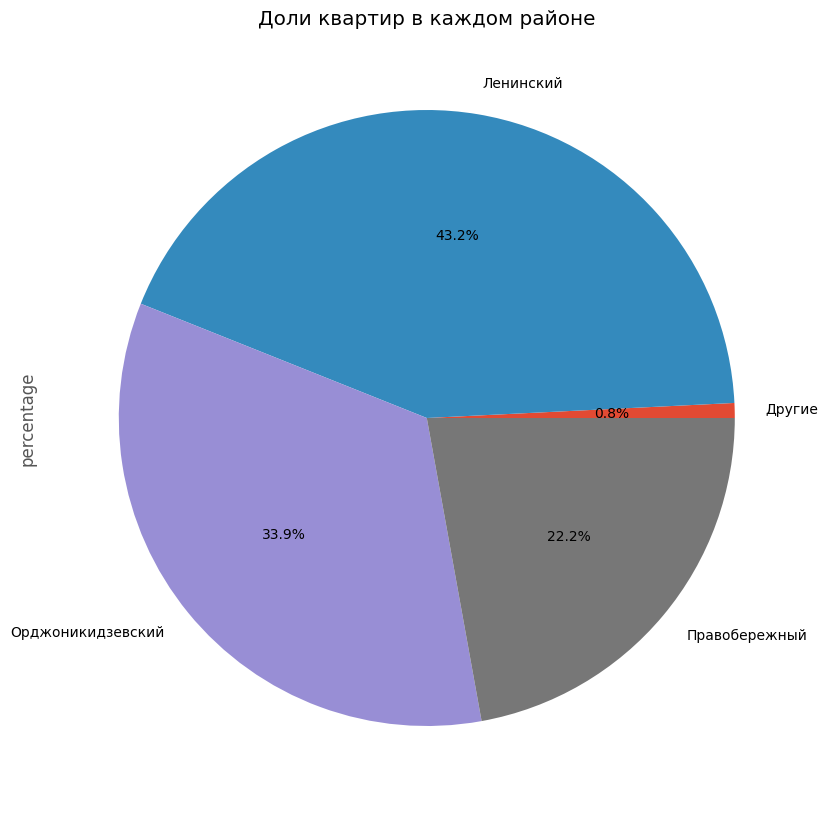

In [51]:
# Распределение по районам

def df_for_pie_chart(x):
    if x['percentage'] < 0.02:
        return 'Другие'
    else:
        return x['district']


sample = df['clear_district'].value_counts(normalize=True).reset_index()\
    .rename(columns={'index': 'district', 'clear_district': 'percentage'})

sample['new_district'] = sample.apply(df_for_pie_chart, axis=1)


plt.figure(figsize=(10,10))
sample.groupby('new_district')['percentage'].sum().plot.pie(autopct='%1.1f%%');
plt.title('Доли квартир в каждом районе');

In [52]:
# Определяем число непопулярных районов
df[(~df['clear_district'].isin(['Орджоникидзевский', 'Ленинский', 'Правобережный'])) & (~df['clear_district'].isna())].shape[0]

11

**Промежуточные выводы:** можно пренебречь квартирами из непопулярных районов

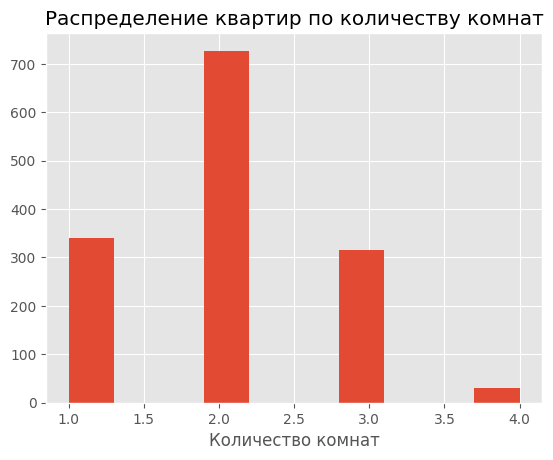

In [53]:
# Распределение квартир по количеству комнат
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
df['room_number'].hist();

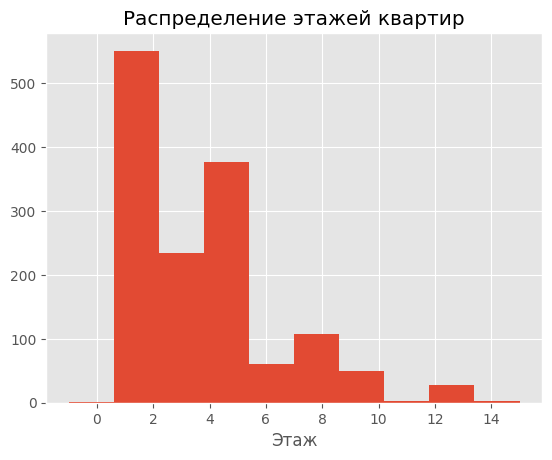

In [54]:
plt.title('Распределение этажей квартир')
plt.xlabel('Этаж')
df['floor'].hist();

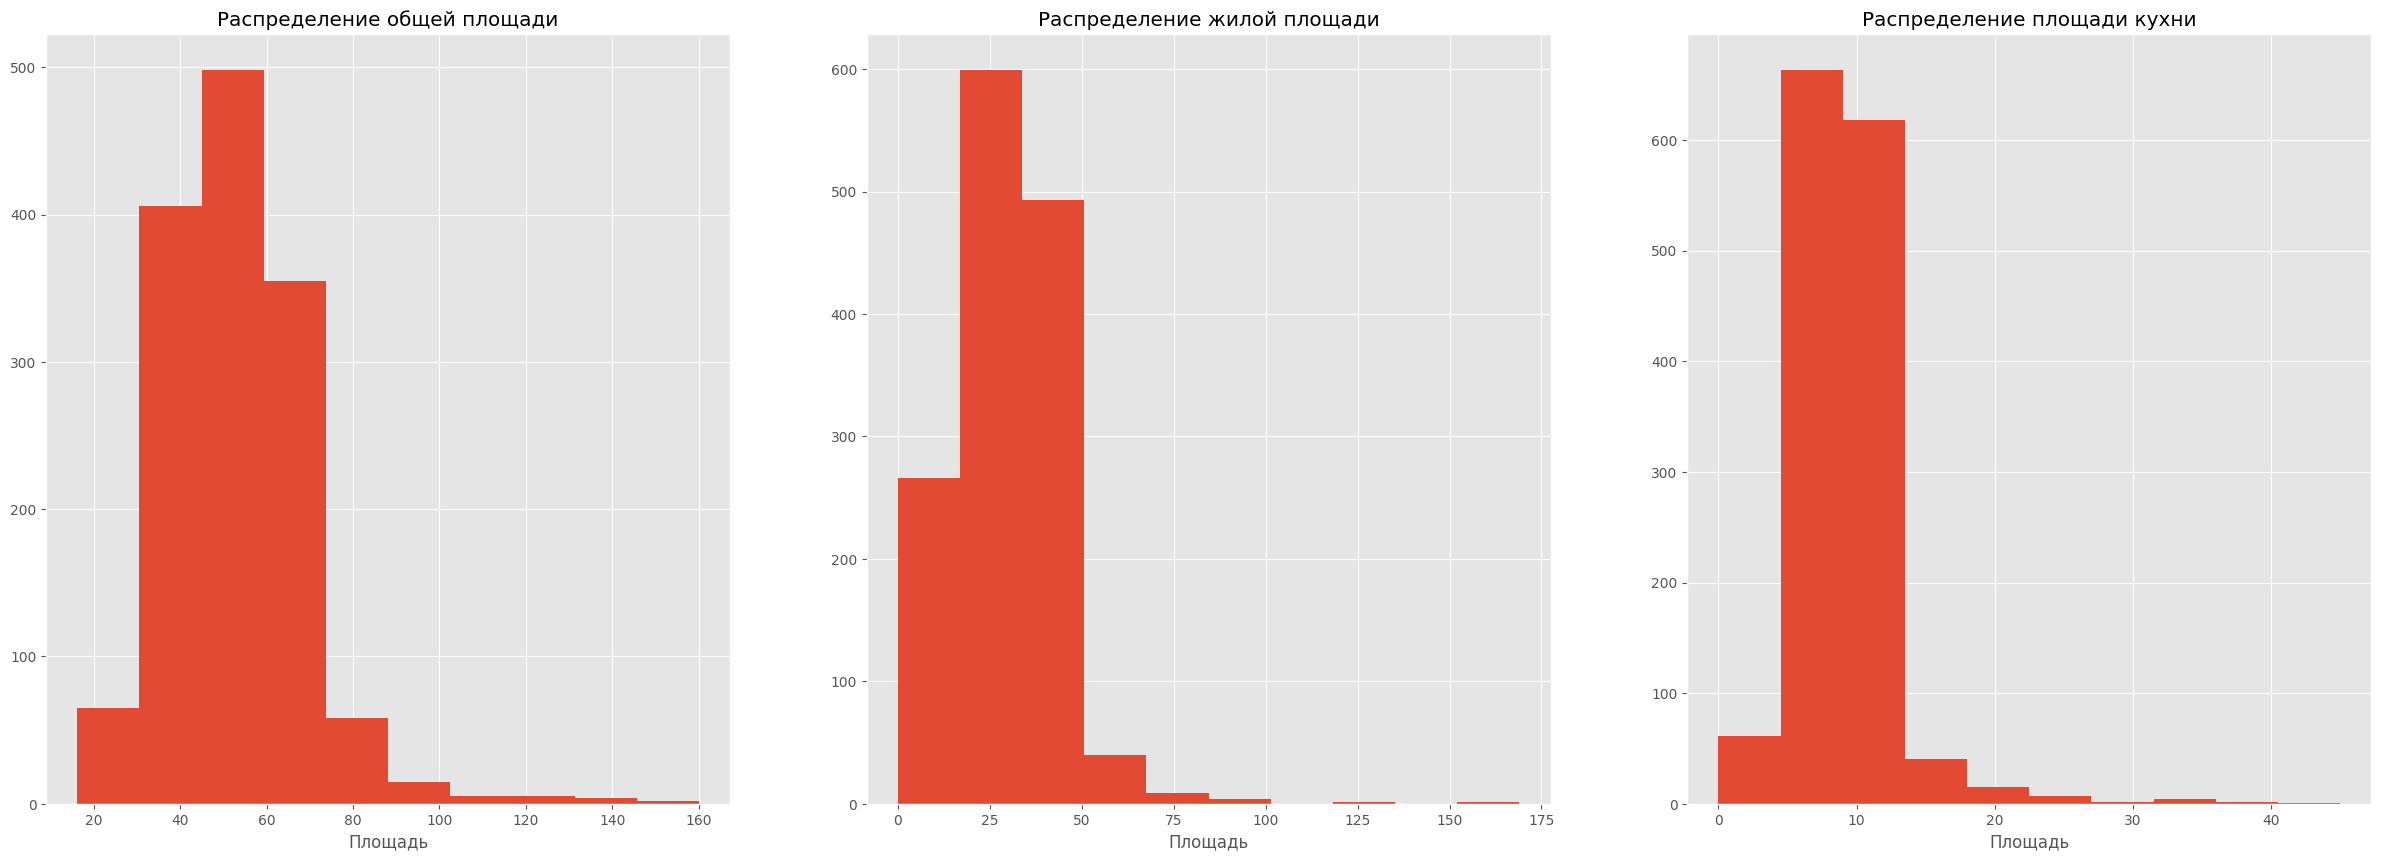

In [34]:
plt.figure(figsize=(30, 10))
plt.title 
plt.subplot(131)
plt.title('Распределение общей площади')
plt.xlabel('Площадь')
df['general_area'].hist();

plt.subplot(132)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
df['living_area'].hist();

plt.subplot(133)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь')
df['kitchen_area'].hist();

**Промежуточные выводы:**
данные распределены ненормально, присутсвует "хвост" в правую сторону

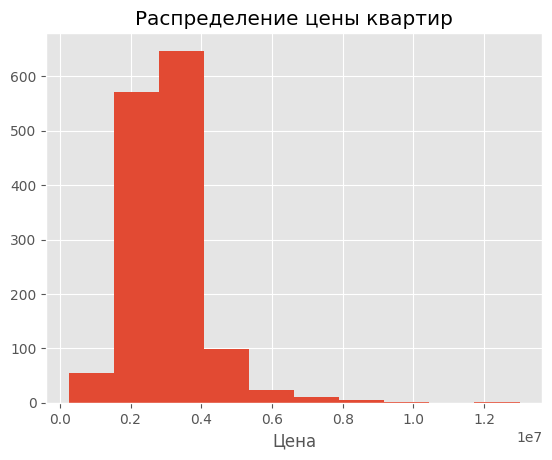

In [35]:
plt.title('Распределение цены квартир')
plt.xlabel('Цена')
df['price'].hist();

**Промежуточные выводы:** в основном цена квартир от 2 млн до 4 млн, однако присутсвуют отклонения в большую сторону"

In [46]:
# Внимательно смотрим на квартиры с большой ценой
df[df['price'] > 8000000]

,room_number,floor,max_floor,general_area,living_area,kitchen_area,price,district
1241,3,6,10,110.0,75.0,17.0,13000000,Орджоникидзевский
1287,3,15,16,127.0,85.0,17.0,9200000,Правобережный
1311,3,5,14,133.0,75.0,20.0,8600000,Орджоникидзевский
1388,4,4,4,136.0,80.0,12.0,8100000,Ленинский
1395,4,2,5,138.0,100.0,27.0,8450000,Ленинский
1407,4,2,2,148.2,95.0,25.0,9500000,Орджоникидзевский
1409,4,3,4,127.0,70.0,28.0,8900000,Ленинский
1410,4,15,16,160.0,120.0,15.0,8490000,Правобережный


Это как раз те квартиры, которые находяться в правом хвосте распределений

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_8376\969595884.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


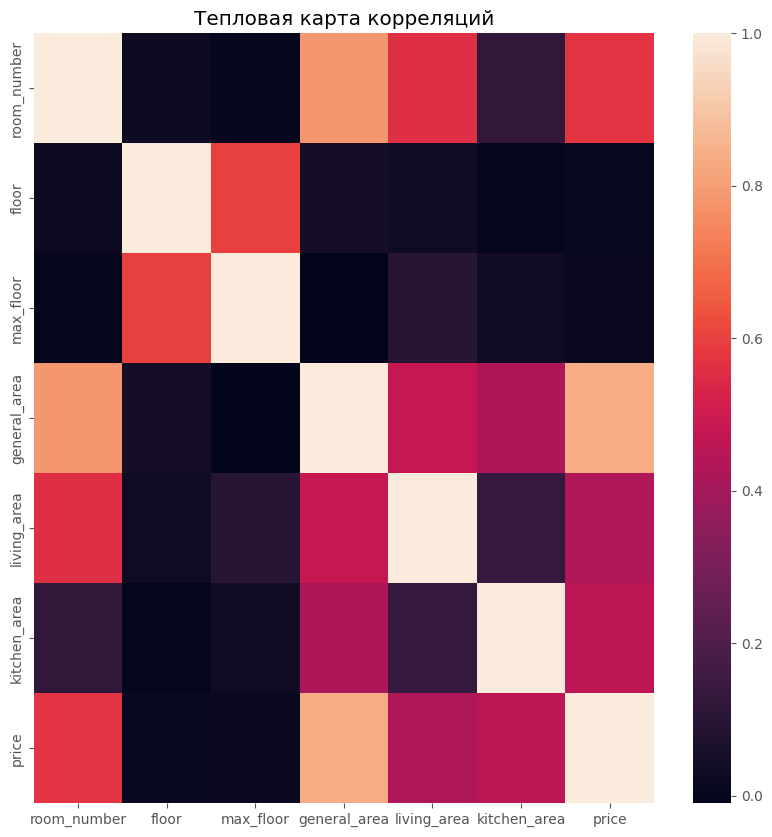

In [47]:
# Строим тепловую карту корреляций
plt.figure(figsize=(10,10));
sns.heatmap(df.corr());
plt.title('Тепловая карта корреляций');

**Промежуточные выводы:** самая сильная корреляция с ценой возникает у общей площади, дальше идет количество комнат и жилая площадь

# Обработка данных

Заполняем пропуски в данных. Для этого определяем популярный район для каждого типа квартиры

In [55]:
churn_dict = df.groupby('room_number')['clear_district'].agg(pd.Series.mode).reset_index().to_dict(orient='record')
room_number_to_common_district = {x['room_number']: x['clear_district'] for x in churn_dict}
room_number_to_common_district

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_8376\1155948804.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  churn_dict = df.groupby('room_number')['clear_district'].agg(pd.Series.mode).reset_index().to_dict(orient='record')


{1: 'Ленинский',
 2: 'Ленинский',
 3: 'Орджоникидзевский',
 4: 'Орджоникидзевский'}

In [57]:
# Сохраняем, чтобы в дальнейшем можно было заполнять ими пропуски
with open('room_number_to_common_district.txt', 'w', encoding="utf8") as f:
    json.dump(room_number_to_common_district, f, ensure_ascii=False)

In [58]:
def fill_na_values(x):
    '''
    Заполняет пропуски самым популярным районом для каждого типа квартиры 
    '''
    if x['clear_district'] is np.nan:
        common_district = room_number_to_common_district[x['room_number']]
        return common_district
    else:
        return x['clear_district']

In [59]:
df['clear_district_wo_na'] = df.apply(fill_na_values, axis=1)

In [60]:
# Удаляем лишние столбцы и переименовываем
df.drop(columns=['district', 'clear_district'], inplace=True)
df.rename(columns={'clear_district_wo_na': 'district'}, inplace=True)

In [61]:
# Удаляем лишние строчки в датафрейме и сохраняем обработанный результат
result_df = df[(df['district'].isin(['Орджоникидзевский', 'Ленинский', 'Правобережный'])) & (df['floor'] > 0)]
result_df.head()

,room_number,floor,max_floor,general_area,living_area,kitchen_area,price,district
0,1,3,5,30.0,18.0,6.0,1780000,Ленинский
1,1,3,5,31.4,17.0,7.0,2100000,Правобережный
2,1,3,5,31.4,18.0,6.0,1830000,Правобережный
3,1,12,14,36.0,0.0,9.0,1610000,Правобережный
4,1,1,5,32.0,25.0,7.0,1750000,Ленинский


In [62]:
result_df.to_json('clear_data.txt', orient='records', force_ascii=False)